# Diabetes Classification Data Analysis

This notebook performs exploratory data analysis (EDA) of a diabetes classification dataset

In [80]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [81]:
# Load the dataset
df = pd.read_csv('Diabetes-Classification.csv')   # store dataset in df
df.head()   # Preview data

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20.0,Normal,80,5.0,No,No,Healthy,NaN,No


In [82]:
df.info()   # Explore data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [83]:
# Check for missing data
df.isnull().sum()

Age                           0
Gender                        0
BMI                           3
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    2
Smoking                       2
Diet                          2
Exercise                      1
Diagnosis                     0
dtype: int64

The are missing values in the BMI, Family History of Diabetes, Smoking, Diet and Exercise.

In [84]:
df = df.dropna()   # Dropping missing values
df.isnull().sum()   # Confirm that there are no missing values

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [85]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,No


## Converting categorical data

In [86]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
cat_col = ['Diagnosis']  # Diagnosis is a column containing categrorical data

le = LabelEncoder()

for col in cat_col:
  df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,0
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,1
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,1
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,1
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,0


In [87]:
# One Hot Encoding
one_encoded = pd.get_dummies(df,columns=['Gender'])
one_encoded.head()

,Age,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,Gender_Female,Gender_Male
0,45,25.0,Normal,100,5.7,No,No,Healthy,Regular,0,False,True
1,55,30.0,High,120,6.4,Yes,Yes,Poor,No,1,True,False
2,65,35.0,High,140,7.1,Yes,Yes,Poor,No,1,False,True
3,75,40.0,High,160,7.8,Yes,Yes,Poor,No,1,True,False
5,50,25.0,Normal,100,5.7,No,No,Healthy,Regular,0,True,False


Selection between label encoding or one hot encoding depends on the type of categorical variable.

label encoding: when values in features are ordinal:order Ex: Education - Bachelors>Masters>Doctorate
Onehotending: When categories are not in order (Nominal Values):  Gender- Male, Female, Smoking etc

In [88]:
# Applying one hot encoding
cat_col = ['Gender', 'Exercise', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet']

one_encoded = pd. get_dummies(df, columns=cat_col)
one_encoded.head()   # Preview data after one hot encoding

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Exercise_No,Exercise_Regular,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor
0,45,25.0,100,5.7,0,False,True,False,True,False,False,True,True,False,True,False,True,False
1,55,30.0,120,6.4,1,True,False,True,False,True,False,False,False,True,False,True,False,True
2,65,35.0,140,7.1,1,False,True,True,False,True,False,False,False,True,False,True,False,True
3,75,40.0,160,7.8,1,True,False,True,False,True,False,False,False,True,False,True,False,True
5,50,25.0,100,5.7,0,True,False,False,True,False,False,True,True,False,True,False,True,False


In [89]:
# Label encoding the one hot encoded columns to convert all the string values in newly generated columns to integers
cat_col = ['Gender_Female','Gender_Male', 'Exercise_No', 'Exercise_Regular',
           'Blood Pressure_High', 'Blood Pressure_Low', 'Blood Pressure_Normal',
           'Family History of Diabetes_No', 'Family History of Diabetes_Yes',
           'Smoking_No', 'Smoking_Yes', 'Diet_Healthy', 'Diet_Poor']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_col:
  one_encoded[col] - le.fit_transform(one_encoded[col])

one_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Exercise_No,Exercise_Regular,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor
0,45,25.0,100,5.7,0,False,True,False,True,False,False,True,True,False,True,False,True,False
1,55,30.0,120,6.4,1,True,False,True,False,True,False,False,False,True,False,True,False,True
2,65,35.0,140,7.1,1,False,True,True,False,True,False,False,False,True,False,True,False,True
3,75,40.0,160,7.8,1,True,False,True,False,True,False,False,False,True,False,True,False,True
5,50,25.0,100,5.7,0,True,False,False,True,False,False,True,True,False,True,False,True,False


Uncomment cell 13 below to use label encoding instead of one hot encoding 

In [90]:
# Assignment: Using Label encoding instead of One hot encoding
from sklearn.preprocessing import LabelEncoder

## Label Encoding

#cat_col = ['Gender', 'Exercise', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet']

#le = LabelEncoder()

#one_encoded = df

#for col in cat_col:
# one_encoded[col] = le.fit_transform(one_encoded[col])

#one_encoded.head()



Performing:
* Descriptive analysis
* Exploratory data analysis


In [91]:
df.describe()

,Age,BMI,FBS,HbA1c,Diagnosis
count,118.00000,118.000000,118.000000,118.000000,118.000000
mean,43.09322,36.220339,163.559322,7.924576,0.254237
std,21.46792,16.542685,62.244698,2.178564,0.437288
min,12.00000,10.000000,80.000000,5.000000,0.000000
25%,28.00000,24.000000,120.000000,6.400000,0.000000
50%,40.00000,34.000000,160.000000,7.800000,0.000000
75%,56.50000,48.500000,220.000000,9.900000,0.750000
max,185.00000,105.000000,280.000000,12.000000,1.000000


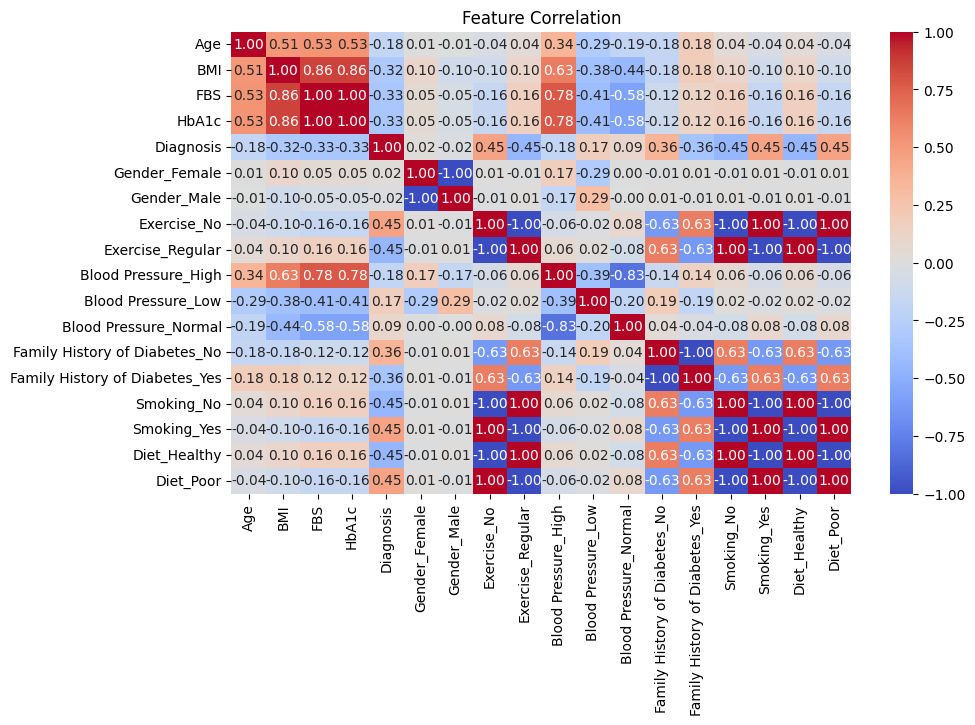

In [92]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(one_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

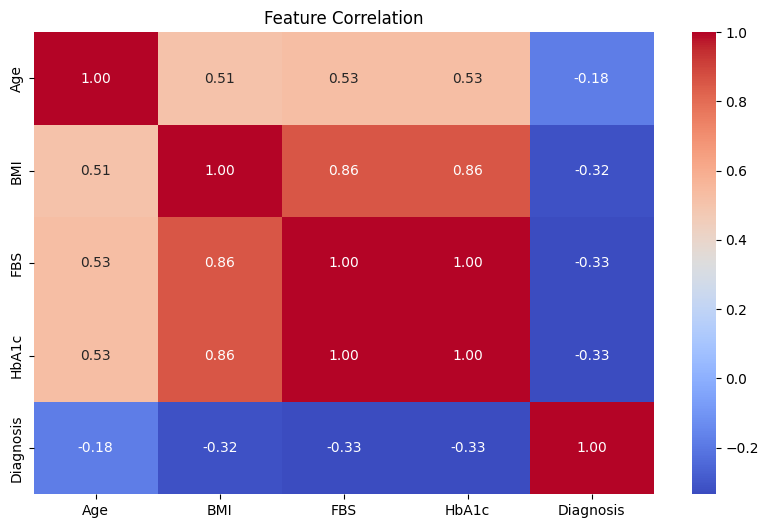

In [93]:
# Correlation heatmap including only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

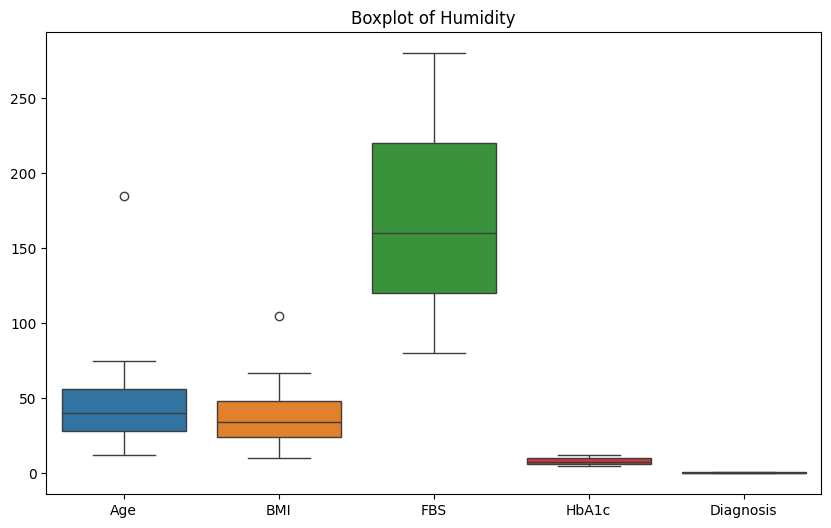

In [94]:
# Boxplots of the data
plt.figure(figsize=(10,6))
sns.boxplot(data=numeric_df)
plt.title('Boxplot of Humidity')
plt.show()

## Feature Selection:
### Removing irrelevant features which does not contribute towards the label(Diagnosis)

In [ ]:
# Defining feature selection model
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest( score_func=f_classif, k=5)

# Splitting label and features
x = one_encoded.drop('Diagnosis', axis=1)   # Removing diagnosis from dataframe
y = one_encoded['Diagnosis']

# Applying feature selection
x_selected = selector.fit_transform(x,y)
selected_features = x.columns[selector.get_support()]
print(selected_features)

Index(['Exercise_Regular', 'Smoking_No', 'Smoking_Yes', 'Diet_Healthy',
       'Diet_Poor'],
      dtype='object')


In [96]:
# Create a DataFrame with selected features
x1 = one_encoded[selected_features]

## Test-Train Split

In [97]:
from sklearn.model_selection import train_test_split

# For all features
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=10)

# For selected features
x1_train, x1_test, y_train, y__test = train_test_split(x1,y,test_size=0.4, random_state=10)


## KNN Models

In [98]:
# Building knn models
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn_selected = KNeighborsClassifier(n_neighbors=5)

In [99]:
# Training models
# For all features
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# For selected features
knn_selected.fit(x1_train,y_train)
y_pred_knn1 = knn_selected.predict(x1_test)

## Classification Report

In [100]:
from sklearn.metrics import classification_report

print("\nKNN Performance:")
print(classification_report(y_test,y_pred_knn))

print("\nKNN_Selected Performance: ")
print(classification_report(y_test, y_pred_knn1))


KNN Performance:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.20      0.33      0.25         9

    accuracy                           0.62        48
   macro avg       0.51      0.51      0.50        48
weighted avg       0.70      0.62      0.66        48


KNN_Selected Performance: 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        39
           1       0.33      1.00      0.50         9

    accuracy                           0.62        48
   macro avg       0.67      0.77      0.60        48
weighted avg       0.88      0.62      0.66        48



## SVM Models

In [101]:
# Building svm models
from sklearn.svm import SVC

svm = SVC(kernel= 'rbf', probability=True, random_state=10)
svm_selected = SVC(kernel= 'rbf', probability=True, random_state=10)

In [102]:
# Training models
# For all features
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

# For selected features
svm_selected.fit(x1_train, y_train)
y_pred_svm1 = svm_selected.predict(x1_test)

## Classification Report

In [103]:
from sklearn.metrics import classification_report

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM_Selected Performance:")
print(classification_report(y_test, y_pred_svm1))

SVM Performance:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       0.00      0.00      0.00         9

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48


SVM_Selected Performance:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       0.00      0.00      0.00         9

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

## SVM ALL Features Model

### Confusion

<Axes: >

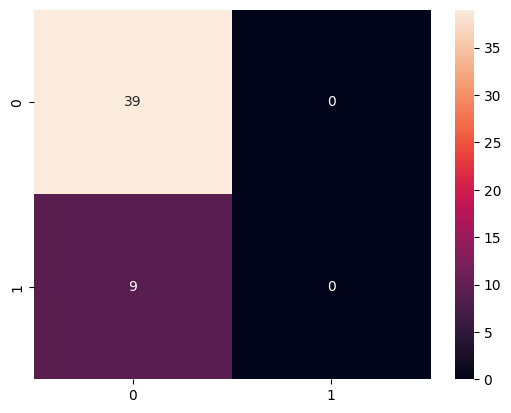

In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True)

### ROC curve

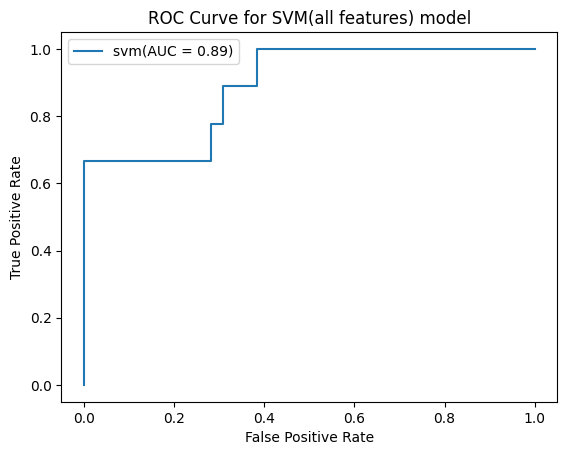

In [105]:
# Plot ROC curve for svm all features model
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = svm.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'svm(AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM(all features) model')
plt.legend()
plt.show()

### SVM Selected Features Model

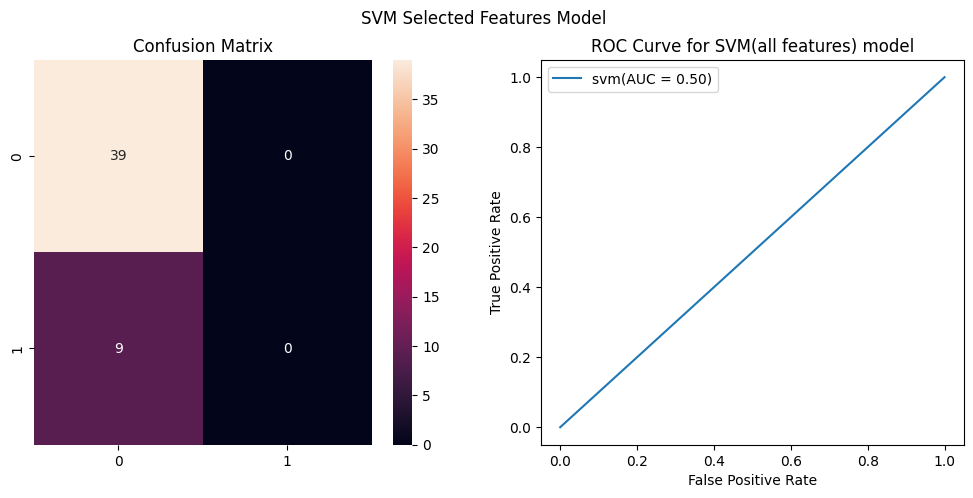

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('SVM Selected Features Model')

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_svm1)
sns.heatmap(cm,annot=True, ax=ax1)
ax1.set_title('Confusion Matrix')

# ROC Curve
y_proba1 = svm_selected.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba1)
plt.plot(fpr, tpr, label=f'svm(AUC = {roc_auc_score(y_test, y_proba1):.2f})')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for SVM(all features) model')
plt.legend()
plt.show()

### KNN All Features Model

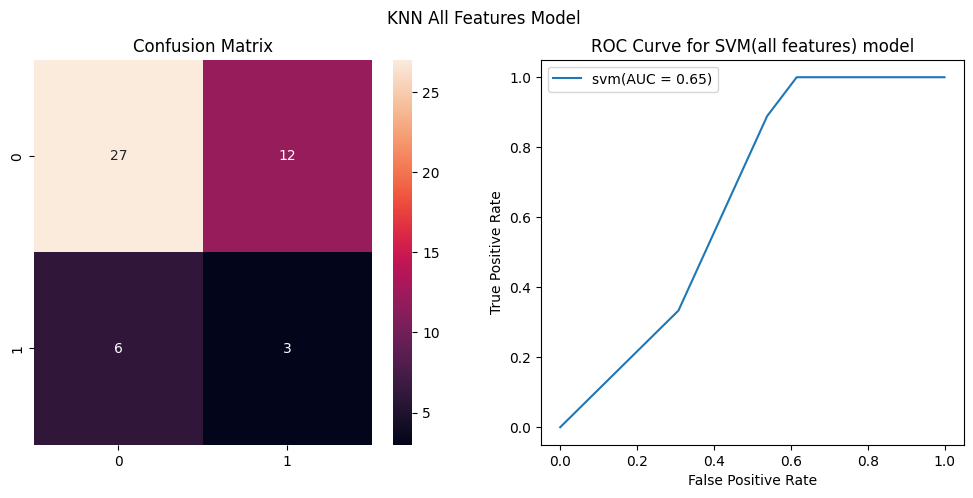

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('KNN All Features Model')

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True, ax=ax1)
ax1.set_title('Confusion Matrix')

# ROC Curve
y_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'svm(AUC = {roc_auc_score(y_test, y_proba):.2f})')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for SVM(all features) model')
plt.legend()
plt.show()

### KNN Selected Features Model

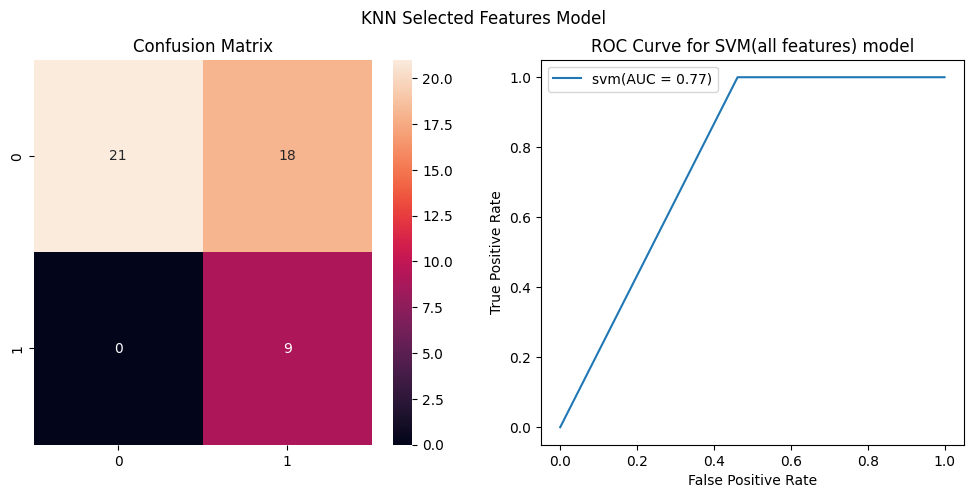

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('KNN Selected Features Model')

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_knn1)
sns.heatmap(cm,annot=True, ax=ax1)
ax1.set_title('Confusion Matrix')

# ROC Curve
y_proba1 = knn_selected.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba1)
plt.plot(fpr, tpr, label=f'svm(AUC = {roc_auc_score(y_test, y_proba1):.2f})')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve for SVM(all features) model')
plt.legend()
plt.show()

## Comparing the Performance of the Models

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Reca

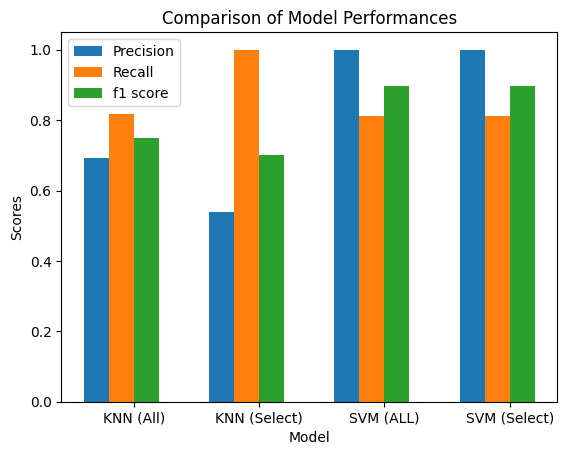

In [109]:
from sklearn.metrics import classification_report

# Models
models = [y_pred_knn, y_pred_knn1, y_pred_svm, y_pred_svm1]

# Metrics
precision = []
recall = []
f1 = []
support = []

# Extracting metrics for each model
for model in models:
  metric_report = classification_report(model,y_test, output_dict=True)   # Store report as a dictionary
  temp_prec = metric_report['0']['precision']   # Extract precision
  temp_recall = metric_report['0']['recall']   # Extract recall
  temp_f1 = metric_report['0']['f1-score']   # Extract f1-score
  temp_support = metric_report['0']['support']   # Extract support

  precision.append(temp_prec)
  recall.append(temp_recall)
  f1.append(temp_f1)
  support.append(temp_support)



positions = np.arange(len(precision))
bar_width = 0.2  # Reduced width to fit 4 bars


# Plot bars with appropriate spacing
plt.bar(positions - 1.5 * bar_width, precision, width=bar_width, label='Precision')
plt.bar(positions - 0.5 * bar_width, recall, width=bar_width, label='Recall')
plt.bar(positions + 0.5 * bar_width, f1, width=bar_width, label='f1 score')
#plt.bar(positions + 1.5 * bar_width, support, width=bar_width, label='Support')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Model Performances')

# Adding legend and xticks
plt.legend()
plt.xticks(positions, ['KNN (All)', 'KNN (Select)', 'SVM (ALL)', 'SVM (Select)'])
plt.show()